In [1]:
!pip install GetoldTweets3

In [2]:
import GetOldTweets3 as got
import re
import string
import pandas as pd
import numpy as np
import datetime
import os
import pandas as pd
import time

In [8]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('COVID UIC') \
        .setSince("2020-01-01") \
        .setUntil("2020-05-01") \
        .setMaxTweets(1000)
# Creation of list that contains all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
# Creating list of chosen tweet data
text_tweets = [[tweet.text] for tweet in tweets]

In [9]:
print(tweets)
print(text_tweets)

[<GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4abe48>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4abc88>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4abd68>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab7b8>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab2e8>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab0f0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab128>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab0b8>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab2b0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab400>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab390>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab550>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab6d8>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4abef0>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4ab710>, <GetOldTweets3.models.Tweet.Tweet object at 0x7fb26a4abd30>, <GetOldTweets3.models.T

In [14]:
#List to text
text=""
for i in range(0,len(text_tweets)):
  text=text_tweets[i][0] + " " + text
print(text)

UIC has created https://today.uic.edu/coronavirus to bring the latest news and information about COVID-19 to the campus community. #coronavirus #COVID19 """UIC is a global university. members of our community, particularly Asian/Asian Americans, have expd racial harassment + xenophobic remarks, and been made to feel unwelcome in the wake of the COVID-19. This conduct has no place at UIC...""" https://today.uic.edu/novel-coronavirus-update-feb-28-2020 The U of I System's COVID-19 Planning and Response Team will include experts from each of the the system's three universities– @thisisUIC, @Illinois_Alma, and @UISedu—and will be led by Dr. Robert A. Barish from #UIC.  Via email from St. John Paul II Newman Center at UIC. #COVID19 #Mass New temporary liturgical policies and procedures arising from spread of COVID-19.  @UICnews Harvard and Columbia have gone exclusively digital for the rest of the semester due to virus concerns. As there are reported covid-19 cases in Chicago, when will UIC

In [16]:
#Remove Punctuations
text = text.translate(str.maketrans('','',string.punctuation))
print(text)

UIC has created httpstodayuiceducoronavirus to bring the latest news and information about COVID19 to the campus community coronavirus COVID19 UIC is a global university members of our community particularly AsianAsian Americans have expd racial harassment  xenophobic remarks and been made to feel unwelcome in the wake of the COVID19 This conduct has no place at UIC httpstodayuicedunovelcoronavirusupdatefeb282020 The U of I Systems COVID19 Planning and Response Team will include experts from each of the the systems three universities– thisisUIC IllinoisAlma and UISedu—and will be led by Dr Robert A Barish from UIC  Via email from St John Paul II Newman Center at UIC COVID19 Mass New temporary liturgical policies and procedures arising from spread of COVID19  UICnews Harvard and Columbia have gone exclusively digital for the rest of the semester due to virus concerns As there are reported covid19 cases in Chicago when will UIC go digital this semester It SHOULD be an option for concerne

In [17]:
#Remove Apostrophes
text = text.replace("'","")

In [20]:
#Tokenize to form words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
words = word_tokenize(text,"english")
print(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['UIC', 'has', 'created', 'httpstodayuiceducoronavirus', 'to', 'bring', 'the', 'latest', 'news', 'and', 'information', 'about', 'COVID19', 'to', 'the', 'campus', 'community', 'coronavirus', 'COVID19', 'UIC', 'is', 'a', 'global', 'university', 'members', 'of', 'our', 'community', 'particularly', 'AsianAsian', 'Americans', 'have', 'expd', 'racial', 'harassment', 'xenophobic', 'remarks', 'and', 'been', 'made', 'to', 'feel', 'unwelcome', 'in', 'the', 'wake', 'of', 'the', 'COVID19', 'This', 'conduct', 'has', 'no', 'place', 'at', 'UIC', 'httpstodayuicedunovelcoronavirusupdatefeb282020', 'The', 'U', 'of', 'I', 'Systems', 'COVID19', 'Planning', 'and', 'Response', 'Team', 'will', 'include', 'experts', 'from', 'each', 'of', 'the', 'the', 'systems', 'three', 'universities–', 'thisisUIC', 'IllinoisAlma', 'and', 'UISedu—and', 'will', 'be', 'led', 'by', 'Dr', 'Robert', 'A', 'Barish', 'from', 'UI

In [27]:
#Remove stop words
nltk.download('stopwords')
from nltk.corpus import stopwords


next_words = [w for w in words if w not in stopwords.words('english')]
print(next_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['UIC', 'created', 'httpstodayuiceducoronavirus', 'bring', 'latest', 'news', 'information', 'COVID19', 'campus', 'community', 'coronavirus', 'COVID19', 'UIC', 'global', 'university', 'members', 'community', 'particularly', 'AsianAsian', 'Americans', 'expd', 'racial', 'harassment', 'xenophobic', 'remarks', 'made', 'feel', 'unwelcome', 'wake', 'COVID19', 'This', 'conduct', 'place', 'UIC', 'httpstodayuicedunovelcoronavirusupdatefeb282020', 'The', 'U', 'I', 'Systems', 'COVID19', 'Planning', 'Response', 'Team', 'include', 'experts', 'systems', 'three', 'universities–', 'thisisUIC', 'IllinoisAlma', 'UISedu—and', 'led', 'Dr', 'Robert', 'A', 'Barish', 'UIC', 'Via', 'email', 'St', 'John', 'Paul', 'II', 'Newman', 'Center', 'UIC', 'COVID19', 'Mass', 'New', 'temporary', 'liturgical', 'policies', 'procedures', 'arising', 'spread', 'COVID19', 'UICnews', 'Harvard', 'Columbia', 'gone'

In [35]:
 #Lemmatization - From plural to single + Base form of a word (example better-> good)
 from nltk.stem import WordNetLemmatizer
 nltk.download('wordnet')
 lemma_words =[WordNetLemmatizer().lemmatize(word) for word in next_words]

 print(lemma_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['UIC', 'created', 'httpstodayuiceducoronavirus', 'bring', 'latest', 'news', 'information', 'COVID19', 'campus', 'community', 'coronavirus', 'COVID19', 'UIC', 'global', 'university', 'member', 'community', 'particularly', 'AsianAsian', 'Americans', 'expd', 'racial', 'harassment', 'xenophobic', 'remark', 'made', 'feel', 'unwelcome', 'wake', 'COVID19', 'This', 'conduct', 'place', 'UIC', 'httpstodayuicedunovelcoronavirusupdatefeb282020', 'The', 'U', 'I', 'Systems', 'COVID19', 'Planning', 'Response', 'Team', 'include', 'expert', 'system', 'three', 'universities–', 'thisisUIC', 'IllinoisAlma', 'UISedu—and', 'led', 'Dr', 'Robert', 'A', 'Barish', 'UIC', 'Via', 'email', 'St', 'John', 'Paul', 'II', 'Newman', 'Center', 'UIC', 'COVID19', 'Mass', 'New', 'temporary', 'liturgical', 'policy', 'procedure', 'arising', 'spread', 'COVID19', 'UICnews', 'Harvard', 'Columbia', 'gone', 'exclusiv

In [46]:
 print(lemma_words[1])

created


In [49]:
#Positive vs Negative sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

#List to text
cleaned_text=""
for i in range(0,len(lemma_words)):
  cleaned_text=lemma_words[i] + " " + cleaned_text
print(cleaned_text)
score = SentimentIntensityAnalyzer().polarity_scores(cleaned_text)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
COVID ho kmv djl stm dfz lan zlx uic btk anw hui sof vhk ihs vrs nwb kwj tke anl nec txt nlu axo sjj jit fqt qcs fff qrj zot ovq zvb bfc tky vry ett qac fwy hlp rxr xmm djp kwg zkr rov jmn hux gxy dsd byz erd edd vnm vrq bbr por lre wkk joz httpstodayuiceduuicjoinsregistryofcovid19frontlinecareproviderspreventivedrugtrial trial drug preventive provider care frontline COVID19 registry join UIC COVID fbb jxc hak urd jyd emf rjz thn lzv qsq hyw gtt upp wdk dft pob msc yod jsq mqu eqk uip exh kgf gac mzh kri xfp jma jpj csz ttz ekd qve qag bqn mnp utn zdy miu uic chd xsh cej spy dli vem hwn faa rhe wrc lln ccq mjb sco mje uwv yea mkz COVID19 LiftHealthForAll CT 1030am1230pm 2020 1st May Friday httpbitlyuicmhc Register COVID19 Dimensions Justice Social HealthEquity Understanding Conference Health Minority UIC Annual 11th UICMHCs Check httpstodayuiceduuicjoinsregistr

In [50]:
print(score)

{'compound': 1.0, 'neg': 0.068, 'neu': 0.803, 'pos': 0.129}

In [52]:
score.pop('compound', None)
score.pop('neu', None)
score

{'neg': 0.068, 'pos': 0.129}

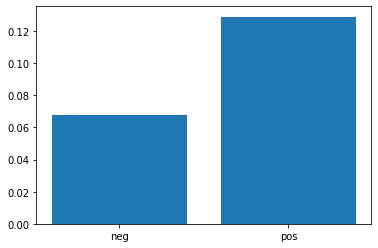

In [55]:
import matplotlib.pylab as plt


plt.bar(range(len(score)), list(score.values()), align='center')
plt.xticks(range(len(score)), list(score.keys()))

plt.show()



In [57]:
#Rename Labels
score1['positive'] = score1.pop('pos')
score1['negative'] = score1.pop('neg')

KeyError: ignored

In [62]:
score1['positive'] *= 100 
score1['negative'] *= 100 

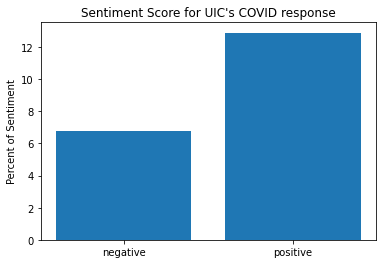

In [67]:
plt.bar(range(len(score1)), list(score1.values()), align='center')
plt.xticks(range(len(score1)), list(score1.keys()))

plt.title("Sentiment Score for UIC's COVID response")
plt.ylabel('Percent of Sentiment')
plt.show()